# Notebook Description

This notebook is for the initial exploration of anomly compisites for RMM phases.

# Packages

In [218]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
from constants import NWABounds
import constants
import calculation_functions
from typing import List
import warnings
warnings.filterwarnings('ignore')
import plotting_functions as pf
import matplotlib.gridspec as gridspec

In [219]:
import sys
from importlib import reload
sys.path.append('')
import load_dataset as load
import phase_calc_functions as phase_calc
import map_trend_functions
import calculation_functions
import miscellaneous#apply_masks

In [220]:
import matplotlib
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

import matplotlib.pylab as pylab

params = {'axes.labelsize' : 16,
         'legend.fontsize': 'x-large',
          'axes.titlesize': 'xx-large',
         }

pylab.rcParams.update(params)

In [221]:
image_dir = '/g/data/w40/ab2313/images/mjo_and_rainfall_trend_images/'

# Data

In [222]:
# Loading awap
awap = load.load_awap()
awap_ws = phase_calc.wet_season_year(awap)

# Loading RMM
rmm = load.load_rmm()
rmm_ws = phase_calc.wet_season_year(rmm)

awap_ws, rmm_ws = calculation_functions.match_dataset_time(awap_ws, rmm_ws)

New datasets are now of lenght d1 = 5578 and d2 = 5578


In [223]:
awap = miscellaneous.apply_masks(awap)

In [224]:
awap_split_ws = phase_calc.split_into_1to8(awap_ws, rmm_ws)

# Calculations

### Grid Cell

In [225]:
rmm_count = phase_calc.count_in_rmm_phase(rmm_ws)
rmm_count = calculation_functions.convert_time_to_year(rmm_count)

In [226]:
awap_count = calculation_functions.resample_count(awap_split_ws)
awap_sum = calculation_functions.resample_sum(awap_split_ws)

In [263]:
awap_count_sub = phase_calc.resample_phase_to_subphase(awap_count)
awap_sum_sub = phase_calc.resample_phase_to_subphase(awap_sum)

Enhanced phase definition being used [5, 6]
Enhanced phase definition being used [5, 6]


In [227]:
climatology_dims = ['phase', 'year']

In [256]:
awap_int

<xarray.Dataset>
Dimensions:  (lat: 81, lon: 173, phase: 9)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 154.2 154.5 154.8 155.0
  * phase    (phase) int64 1 2 3 4 5 6 7 8 0
Data variables:
    precip   (phase, lat, lon) float64 nan nan nan 2.088 ... nan nan nan nan

In [264]:
awap_int = awap_sum.sum(dim='year')/awap_count.sum(dim='year')
awap_int_sub = awap_sum_sub.sum(dim='year')/awap_count_sub.sum(dim='year')

# awap_int_mean = awap_int.mean(dim='phase')
awap_int_climatology = awap_sum.sum(dim=climatology_dims)/awap_count.sum(dim=climatology_dims)

# Climatology
awap_phase_int_anom = awap_int - awap_int_climatology#awap_int_mean
awap_phase_int_anom_sub = awap_int_sub - awap_int_climatology#

In [229]:
awap_rainfall_per_day = awap_sum.sum(dim='year').precip/rmm_count.sum(dim='year').number
awap_rainfall_per_day_anom = awap_rainfall_per_day - awap_rainfall_per_day.mean(dim='phase')

In [230]:
awap_frac_days_rain = awap_count.sum(dim='year').precip/rmm_count.sum(dim='year').number 
awap_frac_days_rain_anom = awap_frac_days_rain - awap_frac_days_rain.mean(dim='phase')

### Space Mean

In [231]:
dims_to_sum = ['lat', 'lon', 'year']

In [232]:
awap_int_space_mean_anom_2 = awap_phase_int_anom.precip.calc.weighted_space_mean()
# awap_int_space_mean_anom_2 = awap_int_space_mean_2 - awap_int_space_mean_2.mean(dim='phase')

In [233]:
# Space mean
awap_int_space_mean =\
awap_sum.sel(constants.nw_slice).sum(dim=dims_to_sum)/awap_count.sel(constants.nw_slice).sum(dim=dims_to_sum)

awap_int_space_mean_anom = awap_int_space_mean - awap_int_space_mean.mean(dim='phase')
awap_int_space_mean_anom = awap_int_space_mean_anom.precip

In [234]:
awap_frac_days_rain_mean = awap_frac_days_rain.sel(constants.nw_slice).calc.weighted_space_mean()

In [235]:
awap_rainfall_per_day_anom_mean = (awap_rainfall_per_day_anom
                                   .sel(constants.nw_slice)
                                   .calc.weighted_space_mean())

# Plots

## Intensity

In [248]:
reload(pf)

<module 'plotting_functions' from '/home/563/ab2313/Documents/mjo_and_rainfall_trend/plotting_functions.py'>

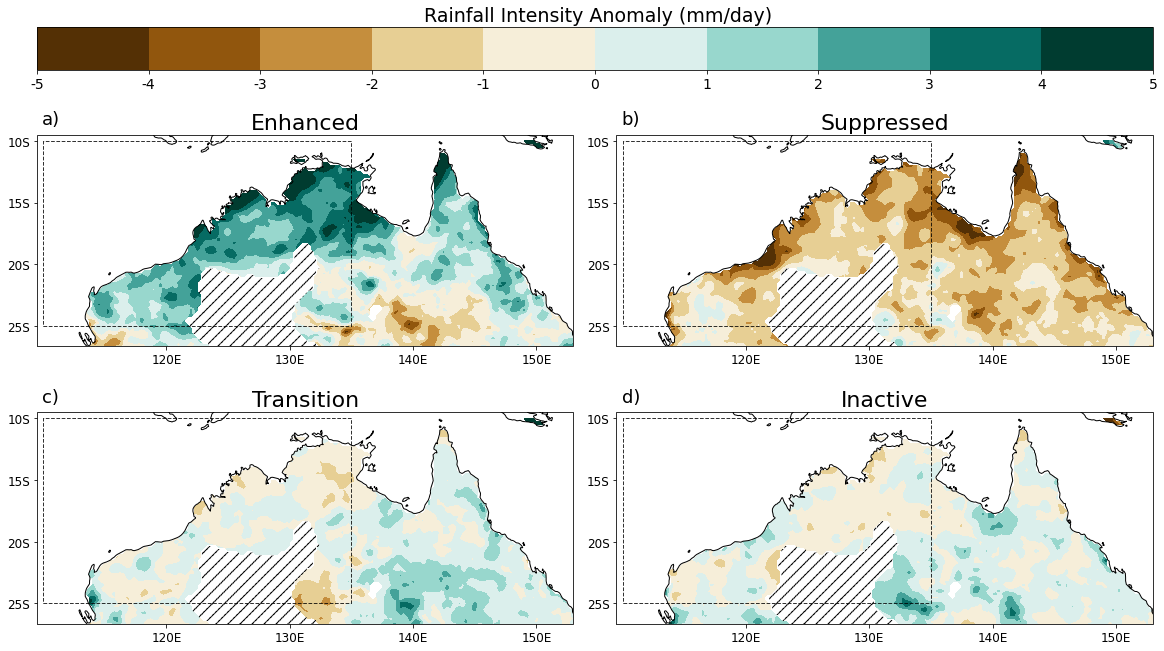

In [265]:
fig = pf.all_phase_trend_plots(awap_phase_int_anom_sub.precip,
               vmax = 5, step = 1, cmap = 'BrBG', tick_symbol=None, round_level=1,
                               colorbar_title = ' Rainfall Intensity Anomaly (mm/day)'
               )
fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, 
                 '00_rainfall_intensitty_anomalies_subphase.png'), dpi=500, bbox_inches='tight')

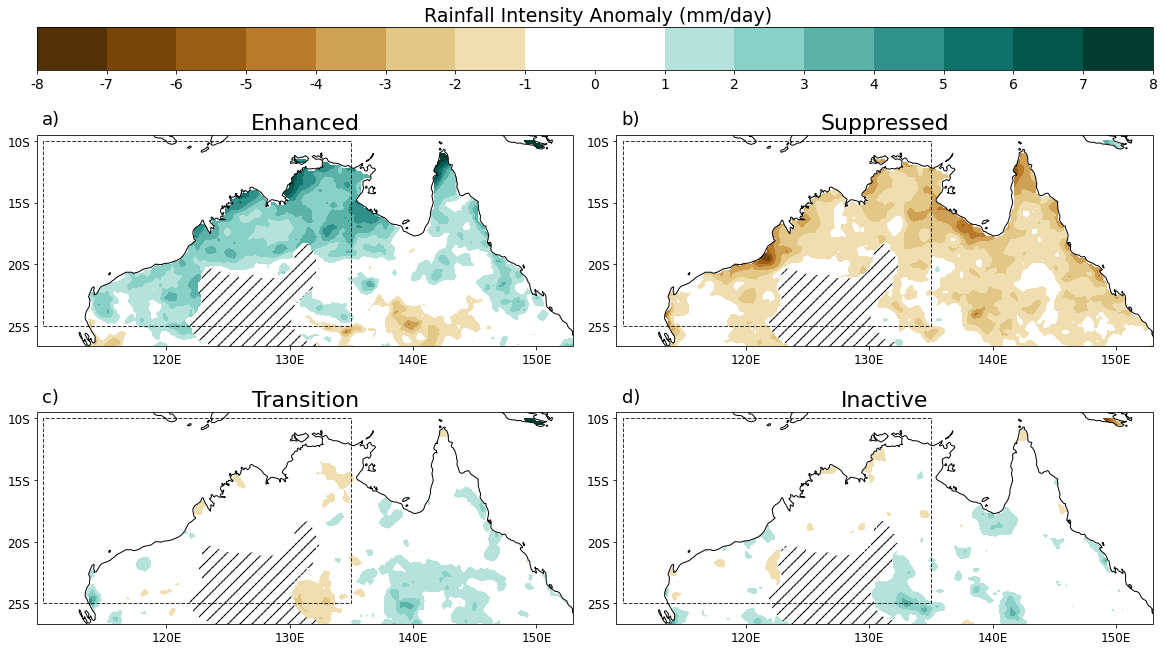

In [268]:
vmax=8
step=1
subphase_cmap = pf.create_discrete_cmap('BrBG', vmax=vmax, step=step, add_white=True)

fig = pf.all_phase_trend_plots(awap_phase_int_anom_sub.precip,
               vmax=vmax, step=step, cmap=subphase_cmap, tick_symbol=None, round_level=1,
                               colorbar_title=' Rainfall Intensity Anomaly (mm/day)'
               )
fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, 
                 '00_rainfall_intensitty_anomalies_subphase_white_cmap.png'), dpi=500, bbox_inches='tight')

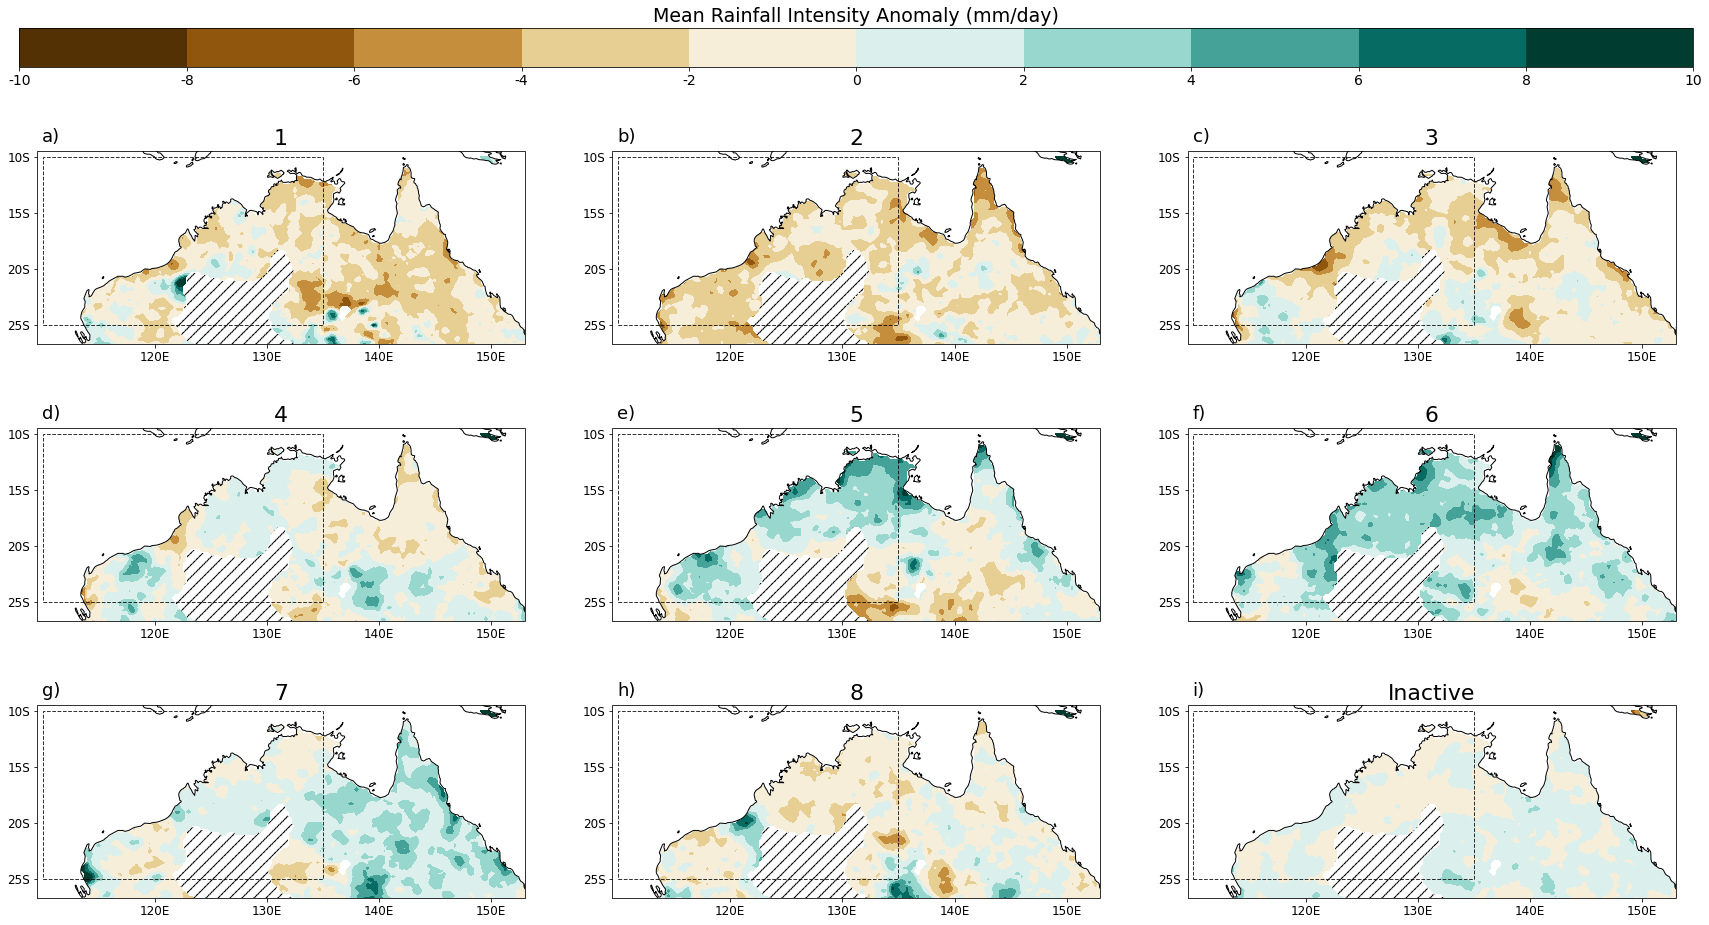

In [237]:
fig = pf.all_phase_trend_plots(awap_phase_int_anom.precip, vmax=10, step=2, cmap = 'BrBG', 
                                tick_symbol=None,
                                colorbar_title = 'Mean Rainfall Intensity Anomaly (mm/day)',
                               )
fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, '00_all_phase_precip_anom.png'),dpi=800, bbox_inches='tight')

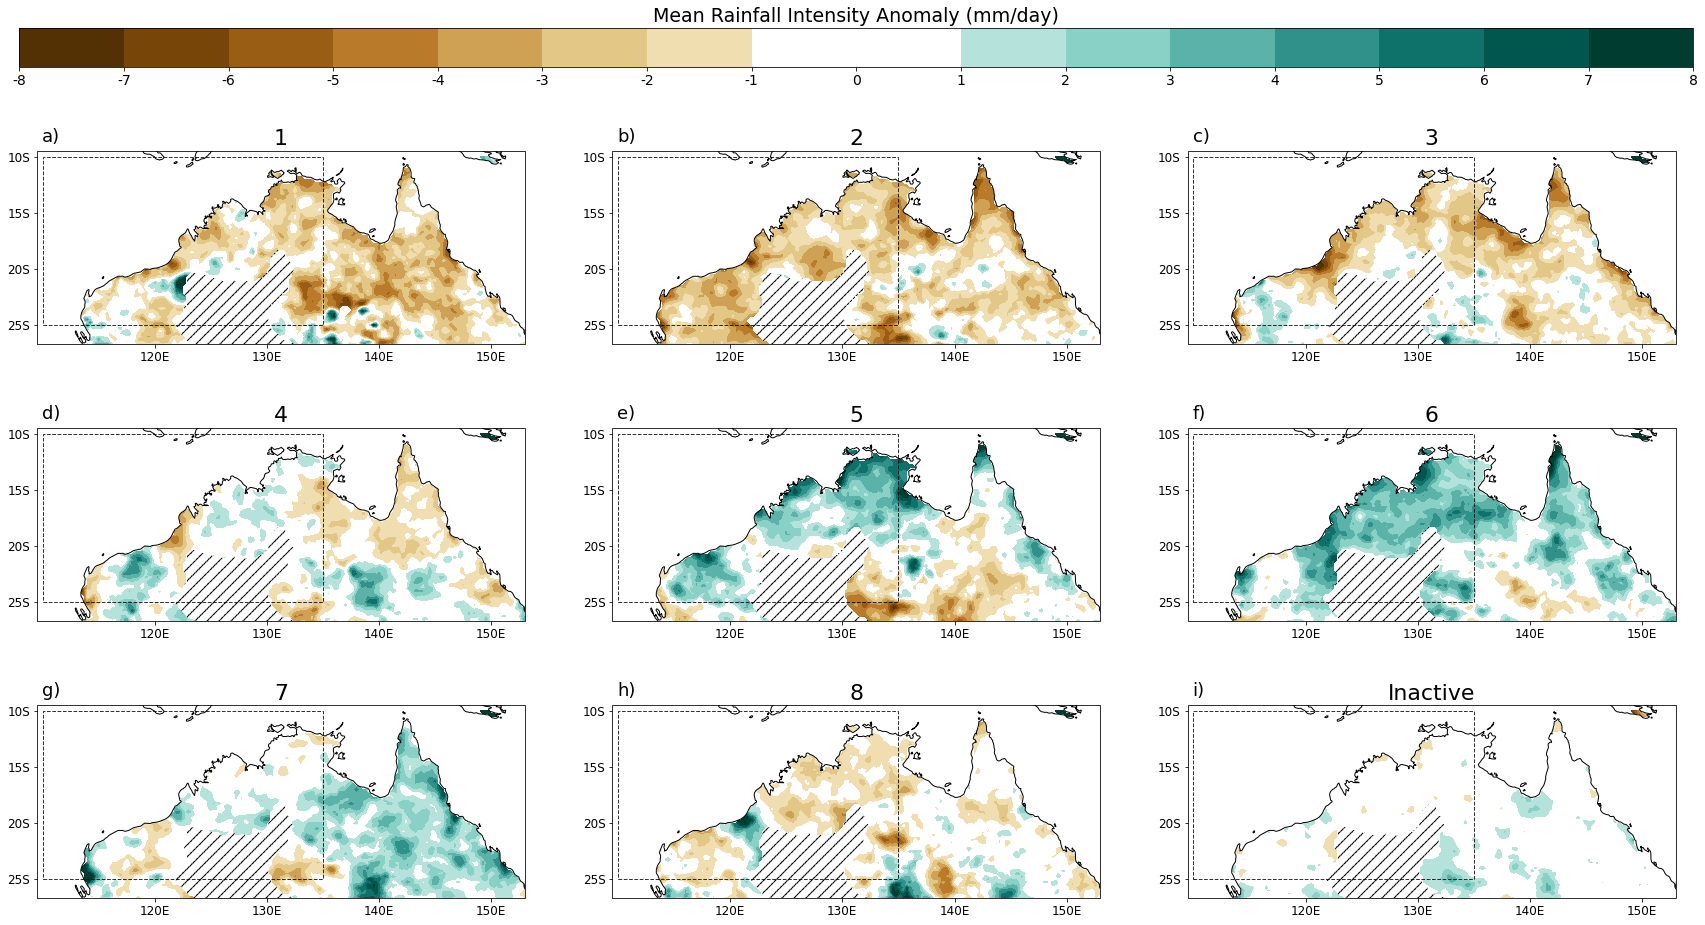

In [269]:
step=1
vmax=8
phase_cmap = pf.create_discrete_cmap('BrBG', vmax=vmax, step=step, add_white=True)

fig = pf.all_phase_trend_plots(awap_phase_int_anom.precip,
                               vmax=vmax, step=step, cmap=phase_cmap, tick_symbol=None,
                                colorbar_title = 'Mean Rainfall Intensity Anomaly (mm/day)',
                               )

fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, '00_all_phase_precip_anom_white_cbar_step_2.png'),
           dpi=800, bbox_inches='tight')

In [239]:
colors = [constants.brown] * 3 + ['lightgrey'] + [constants.green] * 2 + ['lightgrey'] * 3

annotate_position_dict = {'Suppressed\nPhases': {'xy': (1, .4), 'color': constants.brown},
                          'Enhanced\nPhases':{'xy': (4.5, -.4), 'color': constants.green}
                         }

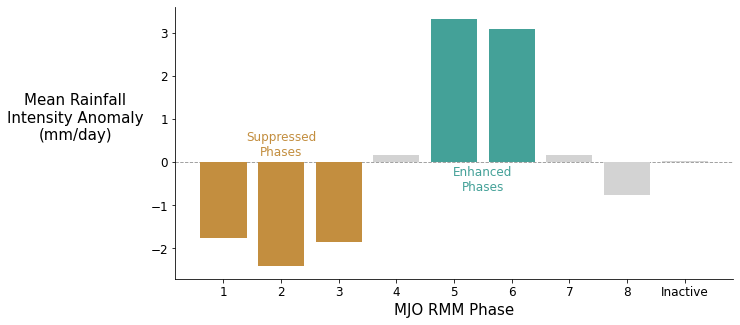

In [240]:
fig, ax = pf.phase_bar_plot(awap_int_space_mean_anom, ylabel='Mean Rainfall\nIntensity Anomaly\n(mm/day)'
                     , colors=colors, annotate_position_dict=annotate_position_dict)
fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, '00_space_mean_intenstiy_bar_plot.png'), 
            dpi=500, bbox_inches='tight')

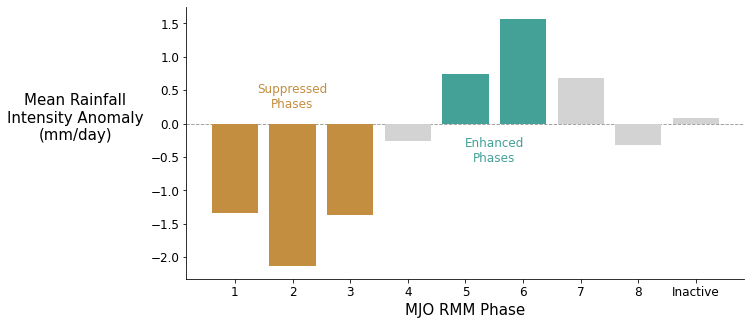

In [241]:
fig, ax = pf.phase_bar_plot(awap_int_space_mean_anom_2, ylabel='Mean Rainfall\nIntensity Anomaly\n(mm/day)'
                     , colors=colors, annotate_position_dict=annotate_position_dict)
# fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, '00_space_mean_intenstiy_bar_plot_v2_space_mean.png'), 
#             dpi=500, bbox_inches='tight')

## Rainfall per Day

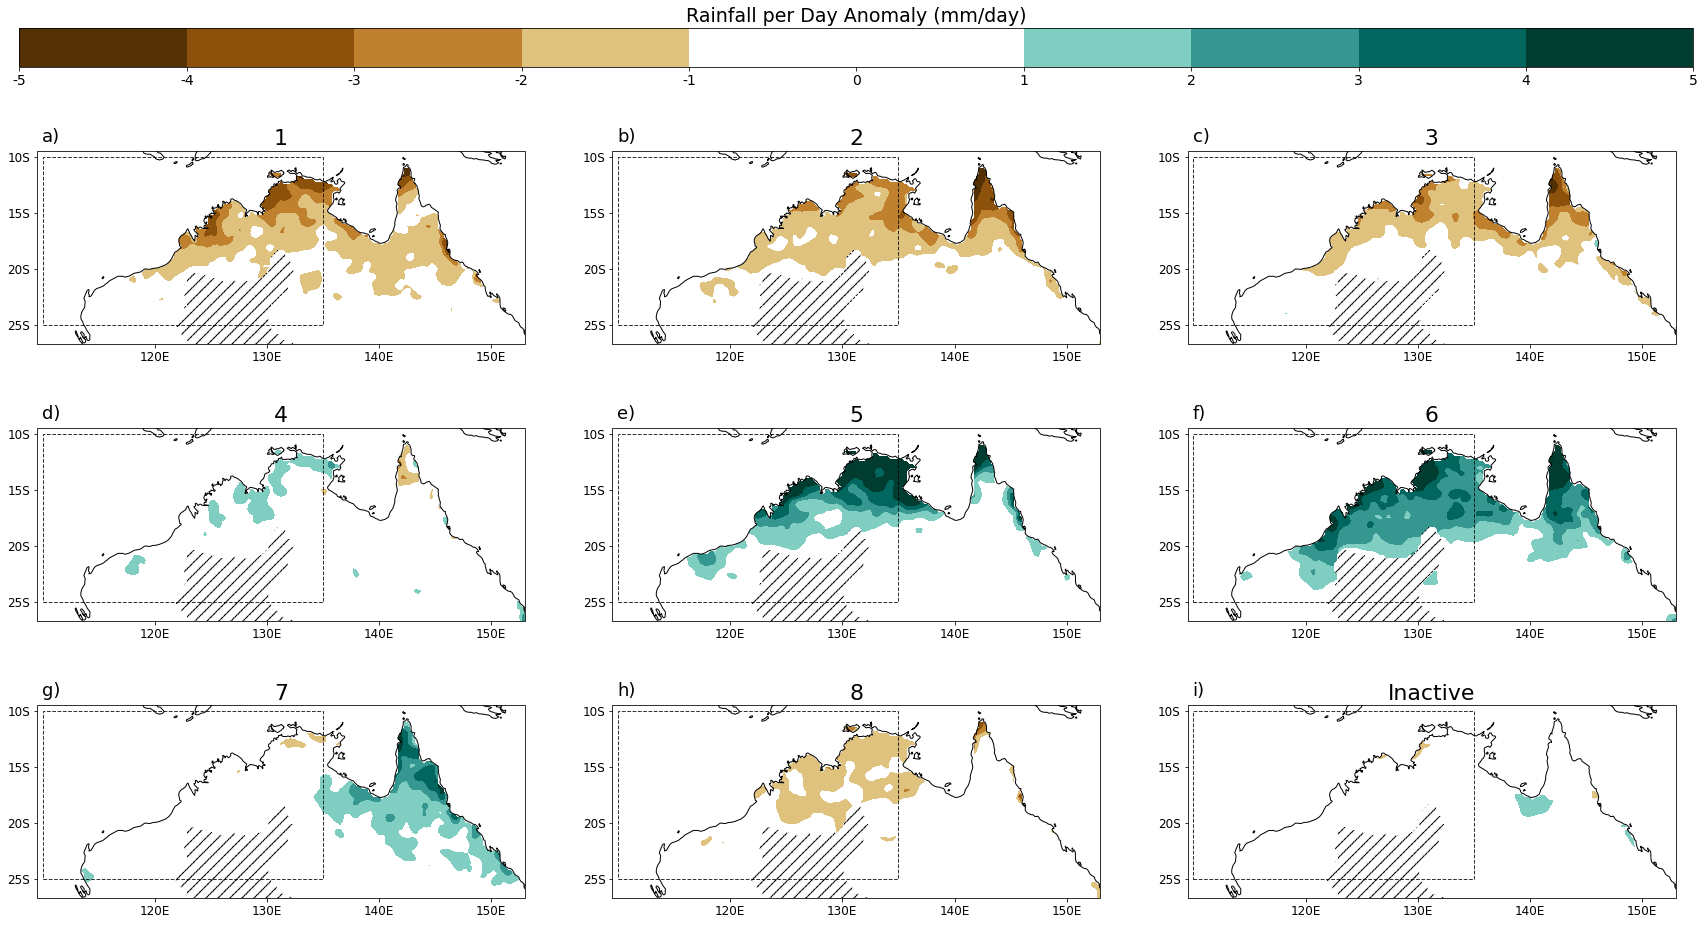

In [242]:
step2=1
vmax2=5
phase_cmap2 = pf.create_discrete_cmap('BrBG', vmax=vmax2, step=step2, add_white=True)

fig = pf.all_phase_trend_plots(awap_rainfall_per_day_anom,
                               vmax=vmax2, step=step2, cmap=phase_cmap2, tick_symbol=None,
                                colorbar_title = 'Rainfall per Day Anomaly (mm/day)',
                               )

fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, '00_all_phase_rainfall_per_day.png'),
           dpi=800, bbox_inches='tight')

In [243]:
colors = [constants.brown] * 3 + ['lightgrey'] + [constants.green] * 2 + ['lightgrey'] * 3

annotate_position_dict = {'Suppressed\nPhases': {'xy': (1, .2), 'color': constants.brown},
                          'Enhanced\nPhases':{'xy': (4.5, -.2), 'color': constants.green}
                         }

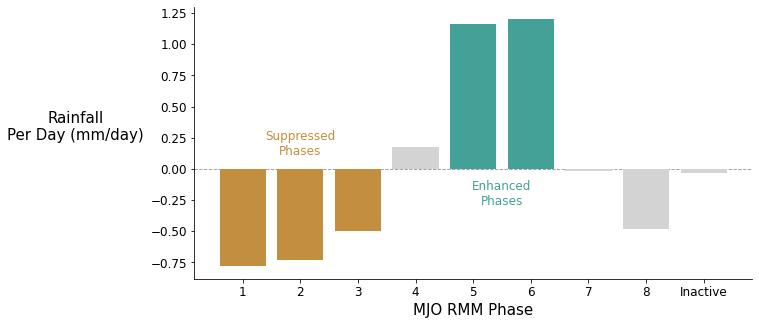

In [244]:
fig, ax = pf.phase_bar_plot(awap_rainfall_per_day_anom_mean, ylabel='Rainfall\nPer Day (mm/day)'
                     , colors=colors, annotate_position_dict=annotate_position_dict)
fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, '00_space_mean_rainfall_per_day.png'), 
            dpi=500, bbox_inches='tight')

## Fraction of Days as Raindays

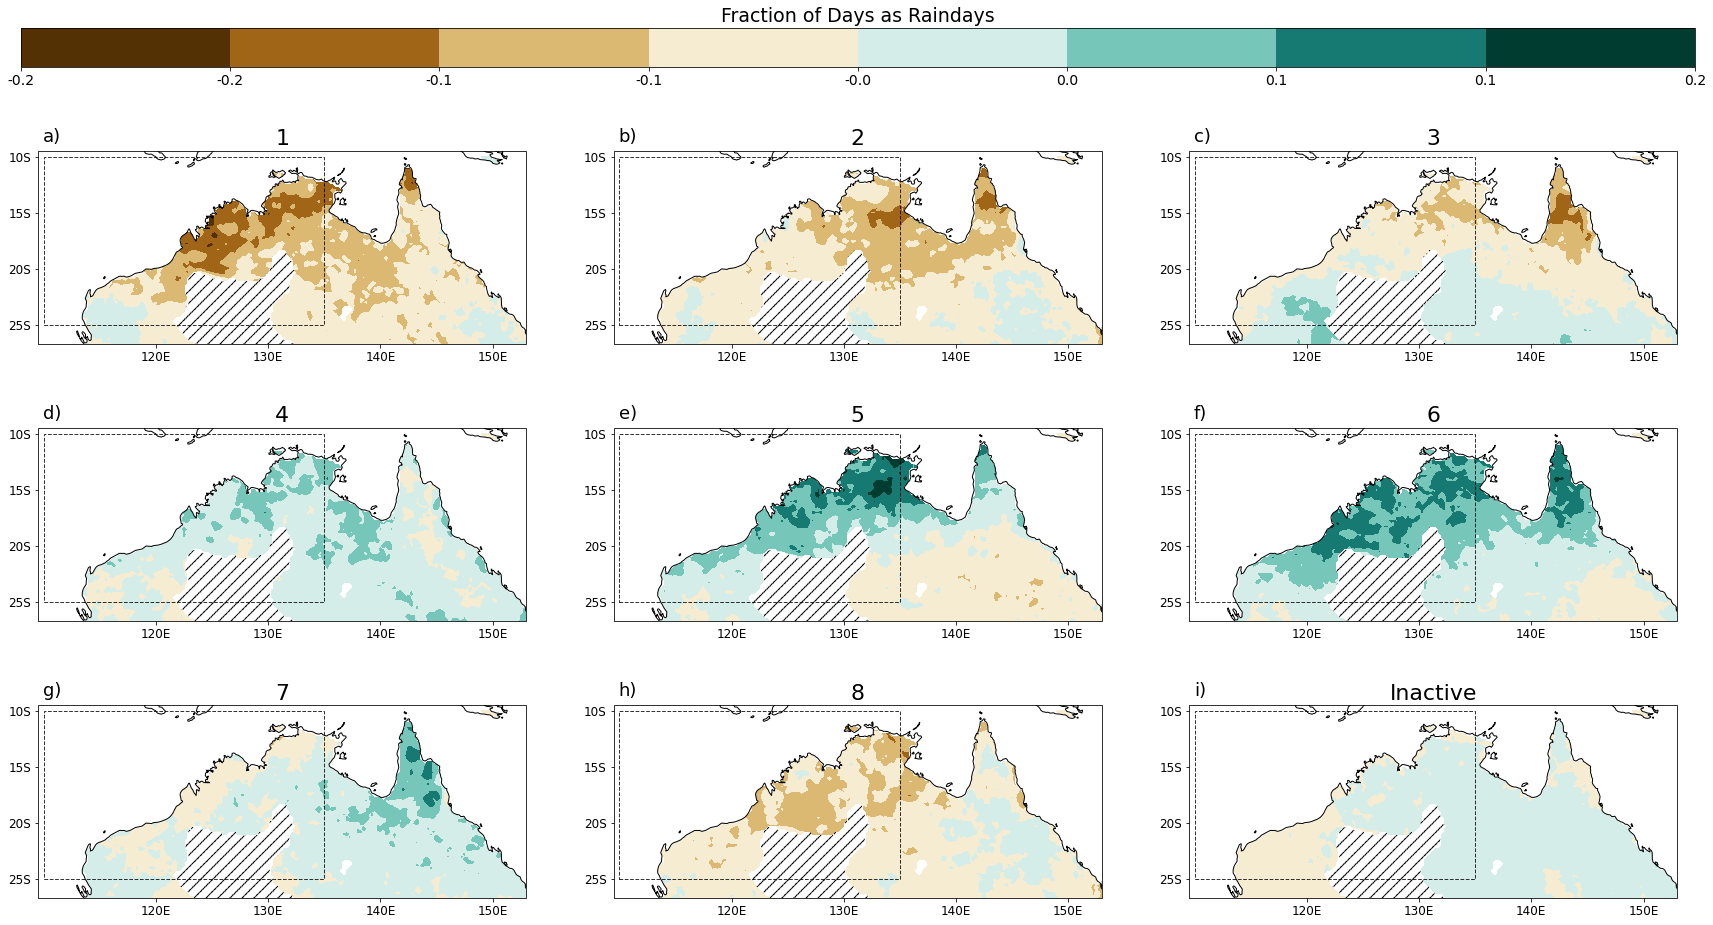

In [245]:
fig = pf.all_phase_trend_plots(awap_frac_days_rain_anom, vmax=.2, step=.05, round_level=1, cmap = 'BrBG', 
                                tick_symbol=None,
                                colorbar_title = 'Fraction of Days as Raindays',
                               )

fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, '00_all_phase_frac_days_as_raindays_anom.png'),
           dpi=800, bbox_inches='tight')

In [246]:
colors = [constants.brown] * 3 + ['lightgrey'] + [constants.green] * 2 + ['lightgrey'] * 3

annotate_position_dict = {'Suppressed\nPhases': {'xy': (1, .2), 'color': constants.brown},
                          'Enhanced\nPhases':{'xy': (5, 0.244), 'color': constants.green}
                         }

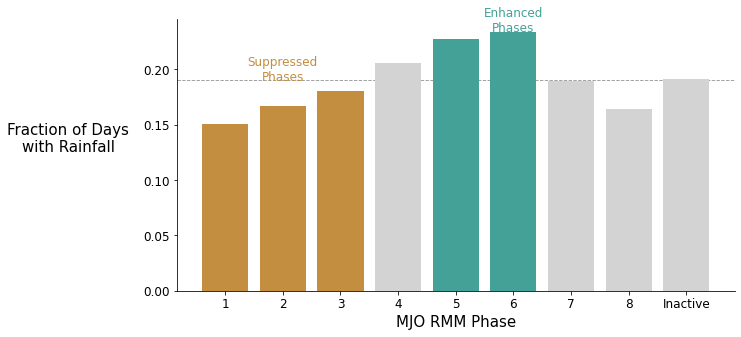

In [247]:
fig, ax = pf.phase_bar_plot(awap_frac_days_rain_mean, ylabel='Fraction of Days\nwith Rainfall'
                     , colors=colors, annotate_position_dict=annotate_position_dict)


ax.axhline([awap_frac_days_rain_mean.mean(dim='phase').values],
           color='k', linestyle='--', zorder=-1000, alpha=0.4, linewidth=0.9)
# fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, '00_space_mean_fraction_days_as_raindays_bar_plot.png'), 
#             dpi=500, bbox_inches='tight')